In [44]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import model_selection, linear_model, metrics, tree, \
preprocessing, ensemble, naive_bayes, feature_selection, neighbors, svm
import xgboost
import re

In [45]:
train = pd.read_csv('data/titanic_train.csv')
test = pd.read_csv('data/titanic_test.csv')

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


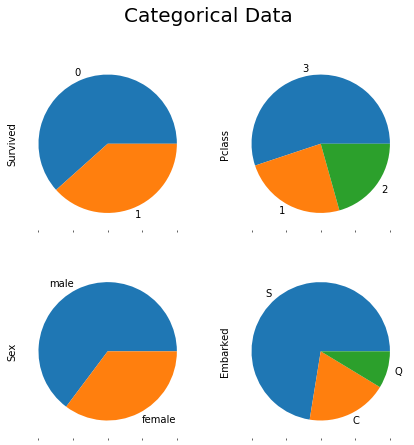

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

In [47]:
# visualize categorical data
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, \
        sharey=False, sharex=True, figsize=(7,7))
fig.suptitle("Categorical Data", size=20)

plt.figure(figsize=(2,2))
train.Survived.value_counts().plot(kind='pie', ax=ax1)
plt.figure(figsize=(2,2))
train.Pclass.value_counts().plot(kind='pie', ax=ax2)
plt.figure(figsize=(2,2))
train.Sex.value_counts().plot(kind='pie', ax=ax3)
plt.figure(figsize=(2,2))
train.Embarked.value_counts().plot(kind='pie', ax=ax4)

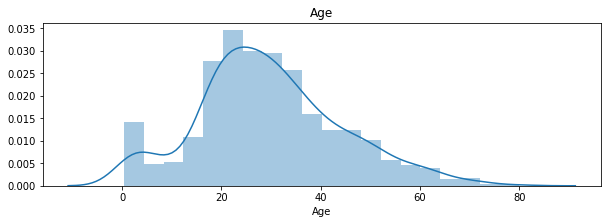

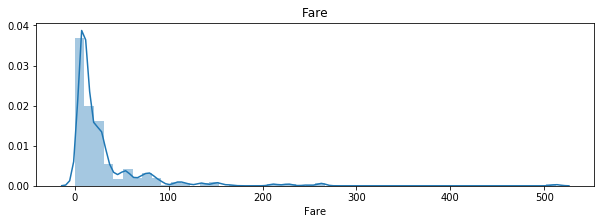

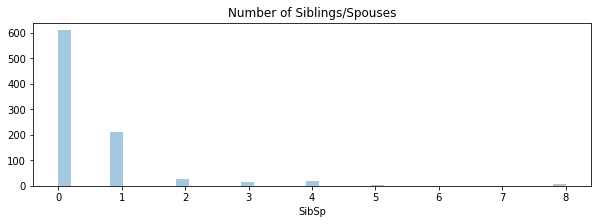

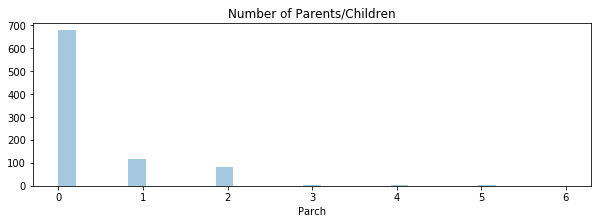

In [48]:
# Visualize numeric data
plt.figure(figsize=(10,3))
sns.distplot(train.Age[train.Age.notnull()])
plt.title('Age')
plt.show()
plt.figure(figsize=(10,3))
sns.distplot(train.Fare)
plt.title('Fare')
plt.show()
plt.figure(figsize=(10,3))
sns.distplot(train.SibSp, kde=False)
plt.title('Number of Siblings/Spouses')
plt.show()
plt.figure(figsize=(10,3))
sns.distplot(train.Parch, kde=False)
plt.title('Number of Parents/Children')
plt.show()

In [49]:
%%html
<div class='tableauPlaceholder' id='viz1480638337057' style='position: relative'>
<noscript>
<a href='#'>
<img alt='Titanic Survival' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47; \
Ti&#47;TitanicVisualizations_0&#47;Story1&#47;1_rss.png' style='border: none' />
</a>
</noscript><object class='tableauViz'  style='display:none;'>
<param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> 
<param name='site_root' value='' /><param name='name' value='TitanicVisualizations_0&#47;Story1' />
<param name='tabs' value='no' /><param name='toolbar' value='yes' />
<param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47; \
Ti&#47;TitanicVisualizations_0&#47;Story1&#47;1.png' /> 
<param name='animate_transition' value='yes' />
<param name='display_static_image' value='yes' />
<param name='display_spinner' value='yes' />
<param name='display_overlay' value='yes' />
<param name='display_count' value='yes' />
</object>
</div>                
<script type='text/javascript'>                    
var divElement = document.getElementById('viz1480638337057');                    
var vizElement = divElement.getElementsByTagName('object')[0];                    
vizElement.style.width='1020px';vizElement.style.height='733px';                    
var scriptElement = document.createElement('script');                    
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
vizElement.parentNode.insertBefore(scriptElement, vizElement);                
</script>

In [50]:
train['family'] = train.SibSp + train.Parch

In [51]:
train['Mr'] = train.Name.apply(lambda x: 1 if re.findall('Mr\.', x) else 0)
train['Master'] = train.Name.apply(lambda x: 1 if re.findall('Master\.', x) else 0)
train['Mrs_Lady_Countess'] = train.Name.apply(lambda x: 1 if re.findall('Mrs\.', x)
                                              or re.findall('Lady\.', x)
                                              or re.findall('Countess\.', x)
                                              else 0)
train['Miss_Ms_Mme_Mlle'] = train.Name.apply(lambda x: 1 if re.findall('Miss\.', x) or re.findall('Ms\.', x) or re.findall('Mlle\.', x) or re.findall('Mme\.', x) else 0)
train['Dr_Don_Sir_Col_Capt_Jonkheer_Major'] = train.Name.apply(lambda x: 1 if re.findall('Don\.', x)
                                                               or re.findall('Dr\.', x)
                                                               or re.findall('Sir\.', x)
                                                               or re.findall('Col\.', x) 
                                                               or re.findall('Capt\.', x)
                                                               or re.findall('Jonkheer\.', x)
                                                               or re.findall('Major\.', x)
                                                               else 0)
train['Rev'] = train.Name.apply(lambda x: 1 if re.findall('Rev\.', x) else 0)
train['has()_name'] = train.Name.apply(lambda x: 1 if re.findall('\(', x) else 0)

In [52]:
train.Cabin.fillna('', inplace=True)
train['Cabin_A'] = train.Cabin.apply(lambda x: 1 if re.findall('A', x) else 0)
train['Cabin_B'] = train.Cabin.apply(lambda x: 1 if re.findall('B', x) else 0)
train['Cabin_C'] = train.Cabin.apply(lambda x: 1 if re.findall('C', x) else 0)
train['Cabin_D'] = train.Cabin.apply(lambda x: 1 if re.findall('D', x) else 0)
train['Cabin_E'] = train.Cabin.apply(lambda x: 1 if re.findall('E', x) else 0)
train['Cabin_F'] = train.Cabin.apply(lambda x: 1 if re.findall('F', x) else 0)
train['Cabin_G'] = train.Cabin.apply(lambda x: 1 if re.findall('G', x) else 0)
train['Multi_Cabin'] = train.Cabin.apply(lambda x: 1 if re.findall(' ', x) else 0)
train['No_Cabin'] = train.Cabin.apply(lambda x: 1 if x=='' else 0)
train['OneDigitCabin'] = train.Cabin.apply(lambda x: 1 if re.findall('[A-Z][0-9]$', x) else 0)
train['TwoDigitCabin'] = train.Cabin.apply(lambda x: 1 if re.findall('[A-Z][0-9]{2}$', x) else 0)
train['ThreeDigitCabin'] = train.Cabin.apply(lambda x: 1 if re.findall('[A-Z][0-9]{3}$', x) else 0)

In [53]:
train['ticket_digits_count'] = train.Ticket.apply(lambda x: len(re.findall('[0-9]', x)))
train['ticket_num'] =  pd.to_numeric(train.Ticket.apply(lambda x: re.findall('[0-9]+$', x)[0] if re.findall('[0-9]+$', x) else 0))
train['LINE'] = train.Ticket.apply(lambda x: 1 if x=='LINE' else 0)
train['ticket_letters'] = train.Ticket.apply(lambda x: re.findall('(.*) ', x)[0] if re.findall('(.*) ', x) else '')

train['A5'] = train.ticket_letters.apply(lambda x: 1 if re.findall('A.*5', x) else 0)
train['A4'] = train.ticket_letters.apply(lambda x: 1 if re.findall('A.*4', x) else 0)
train['CA'] = train.ticket_letters.apply(lambda x: 1 if re.findall('C.*A', x) else 0)
train['SOTON'] = train.ticket_letters.apply(lambda x: 1 if re.findall('SOTON', x) else 0)
train['STON'] = train.ticket_letters.apply(lambda x: 1 if re.findall('STON', x) else 0)
train['F'] = train.ticket_letters.apply(lambda x: 1 if re.findall('F', x) else 0)
train['FC'] = train.ticket_letters.apply(lambda x: 1 if re.findall('F.*C', x) else 0)
train['PC'] = train.ticket_letters.apply(lambda x: 1 if re.findall('P.*C', x) else 0)
train['S'] = train.ticket_letters.apply(lambda x: 1 if re.findall('S', x) else 0)
train['Paris'] = train.ticket_letters.apply(lambda x: 1 if re.findall('[Pp][Aa][Rr][Ii][Ss]', x) else 0)
train['WC'] = train.ticket_letters.apply(lambda x: 1 if re.findall('W.*C', x) else 0)
train['tix_no_letters'] = train.ticket_letters.apply(lambda x: 1 if x=='' else 0)

In [54]:
train['male'] = train.Sex.map({'female':0, 'male':1})
train['embarked_num'] = train.Embarked.map({'S':0, 'C':1, 'Q':2})
train['Pclass_cat'] = train.Pclass.astype(str)

In [55]:
test['family'] = test.SibSp + test.Parch

test['Mr'] = test.Name.apply(lambda x: 1 if re.findall('Mr\.', x) else 0)
test['Master'] = test.Name.apply(lambda x: 1 if re.findall('Master\.', x) else 0)
test['Mrs_Lady_Countess'] = test.Name.apply(lambda x: 1 if re.findall('Mrs\.', x)
                                              or re.findall('Lady\.', x)
                                              or re.findall('Countess\.', x)
                                              else 0)
test['Miss_Ms_Mme_Mlle'] = test.Name.apply(lambda x: 1 if re.findall('Miss\.', x) or re.findall('Ms\.', x) or re.findall('Mlle\.', x) or re.findall('Mme\.', x) else 0)
test['Dr_Don_Sir_Col_Capt_Jonkheer_Major'] = test.Name.apply(lambda x: 1 if re.findall('Don\.', x)
                                                               or re.findall('Dr\.', x)
                                                               or re.findall('Sir\.', x)
                                                               or re.findall('Col\.', x) 
                                                               or re.findall('Capt\.', x)
                                                               or re.findall('Jonkheer\.', x)
                                                               or re.findall('Major\.', x)
                                                               else 0)
test['Rev'] = test.Name.apply(lambda x: 1 if re.findall('Rev\.', x) else 0)
test['has()_name'] = test.Name.apply(lambda x: 1 if re.findall('\(', x) else 0)

test.Cabin.fillna('', inplace=True)
test['Cabin_A'] = test.Cabin.apply(lambda x: 1 if re.findall('A', x) else 0)
test['Cabin_B'] = test.Cabin.apply(lambda x: 1 if re.findall('B', x) else 0)
test['Cabin_C'] = test.Cabin.apply(lambda x: 1 if re.findall('C', x) else 0)
test['Cabin_D'] = test.Cabin.apply(lambda x: 1 if re.findall('D', x) else 0)
test['Cabin_E'] = test.Cabin.apply(lambda x: 1 if re.findall('E', x) else 0)
test['Cabin_F'] = test.Cabin.apply(lambda x: 1 if re.findall('F', x) else 0)
test['Cabin_G'] = test.Cabin.apply(lambda x: 1 if re.findall('G', x) else 0)
test['Multi_Cabin'] = test.Cabin.apply(lambda x: 1 if re.findall(' ', x) else 0)
test['No_Cabin'] = test.Cabin.apply(lambda x: 1 if x=='' else 0)
test['OneDigitCabin'] = test.Cabin.apply(lambda x: 1 if re.findall('[A-Z][0-9]$', x) else 0)
test['TwoDigitCabin'] = test.Cabin.apply(lambda x: 1 if re.findall('[A-Z][0-9]{2}$', x) else 0)
test['ThreeDigitCabin'] = test.Cabin.apply(lambda x: 1 if re.findall('[A-Z][0-9]{3}$', x) else 0)

test['ticket_digits_count'] = test.Ticket.apply(lambda x: len(re.findall('[0-9]', x)))
test['ticket_num'] =  pd.to_numeric(test.Ticket.apply(lambda x: re.findall('[0-9]+$', x)[0] if re.findall('[0-9]+$', x) else 0))
test['LINE'] = test.Ticket.apply(lambda x: 1 if x=='LINE' else 0)
test['ticket_letters'] = test.Ticket.apply(lambda x: re.findall('(.*) ', x)[0] if re.findall('(.*) ', x) else '')

test['A5'] = test.ticket_letters.apply(lambda x: 1 if re.findall('A.*5', x) else 0)
test['A4'] = test.ticket_letters.apply(lambda x: 1 if re.findall('A.*4', x) else 0)
test['CA'] = test.ticket_letters.apply(lambda x: 1 if re.findall('C.*A', x) else 0)
test['SOTON'] = test.ticket_letters.apply(lambda x: 1 if re.findall('SOTON', x) else 0)
test['STON'] = test.ticket_letters.apply(lambda x: 1 if re.findall('STON', x) else 0)
test['F'] = test.ticket_letters.apply(lambda x: 1 if re.findall('F', x) else 0)
test['FC'] = test.ticket_letters.apply(lambda x: 1 if re.findall('F.*C', x) else 0)
test['PC'] = test.ticket_letters.apply(lambda x: 1 if re.findall('P.*C', x) else 0)
test['S'] = test.ticket_letters.apply(lambda x: 1 if re.findall('S', x) else 0)
test['Paris'] = test.ticket_letters.apply(lambda x: 1 if re.findall('[Pp][Aa][Rr][Ii][Ss]', x) else 0)
test['WC'] = test.ticket_letters.apply(lambda x: 1 if re.findall('W.*C', x) else 0)
test['tix_no_letters'] = test.ticket_letters.apply(lambda x: 1 if x=='' else 0)

test['male'] = test.Sex.map({'female':0, 'male':1})
test['embarked_num'] = test.Embarked.map({'S':0, 'C':1, 'Q':2})
test['Pclass_cat'] = test.Pclass.astype(str)


In [56]:
train_test = pd.concat([train, test])

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [57]:
X_age = pd.get_dummies(train_test[(train_test.Embarked.notnull())&(train_test.Age.notnull())&(train_test.Fare.notnull())].drop(
    ['PassengerId', 'Survived', 'Name', 'Age', 'Ticket', 'Cabin', 'ticket_letters', 'Sex',  'embarked_num', 'Pclass'], axis=1))
y_age = train_test[(train_test.Embarked.notnull())&(train_test.Age.notnull())&(train_test.Fare.notnull())].Age

linreg = linear_model.RidgeCV()

cv=model_selection.KFold(shuffle=True, n_splits=10)
scores = model_selection.cross_val_score(linreg, X_age, y_age, cv=cv)
print ('cross-val score:', scores.mean(), '+/-', scores.std()) 

cross-val score: 0.39288227042678237 +/- 0.09289734686125659


In [58]:
# LOG Age Imputation -- Linear Regression Model
X_age = pd.get_dummies(train_test[(train_test.Embarked.notnull())&(train_test.Age.notnull())&(train_test.Fare.notnull())].drop(
    ['PassengerId', 'Survived', 'Name', 'Age', 'Ticket', 'Cabin', 'ticket_letters', 'Sex',  'embarked_num', 'Pclass'], axis=1))
y_age = np.log(train_test[(train_test.Embarked.notnull())&(train_test.Age.notnull())&(train_test.Fare.notnull())].Age)


linreg = linear_model.RidgeCV()

cv=model_selection.KFold(shuffle=True, n_splits=10)
scores = model_selection.cross_val_score(linreg, X_age, y_age, cv=cv)
print ('cross-val score:', scores.mean(), '+/-', scores.std()) 

cross-val score: 0.4708045035575167 +/- 0.0924021981224584


In [59]:
# Feature Reduction for Linear Regression
cv = model_selection.KFold(shuffle=True, n_splits=20)
rfecv = feature_selection.RFECV(linear_model.RidgeCV(), cv=cv)
rfecv.fit(X_age, y_age)
linreg_cols = rfecv.get_support()
X_age_linreg = X_age[X_age.columns[linreg_cols]]

In [60]:
# LOG Age Imputation -- Linear Regression Model with reduced features

linreg = linear_model.RidgeCV()

cv=model_selection.KFold(shuffle=True, n_splits=10)
scores = model_selection.cross_val_score(linreg, X_age_linreg, y_age, cv=cv)
print ('cross-val score:', scores.mean(), '+/-', scores.std())

cross-val score: 0.483162702943522 +/- 0.07363484272991758


In [61]:
# slight change in X_age for decision tree based models
X_age = pd.get_dummies(train_test[(train_test.Embarked.notnull())&(train_test.Age.notnull())&(train_test.Fare.notnull())].drop(
    ['PassengerId', 'Survived', 'Name', 'Age', 'Ticket', 'Cabin', 'ticket_letters', 'Sex',  'Embarked', 'Pclass_cat'], axis=1))

In [62]:
# Random Forest feature reduction
cv = model_selection.KFold(shuffle=True, n_splits=20)
rfecv = feature_selection.RFECV(ensemble.RandomForestRegressor(), cv=cv)
rfecv.fit(X_age, y_age)
rf_cols = rfecv.get_support()
X_age_rf = X_age[X_age.columns[rf_cols]]

In [63]:
# LOG Age Imputation -- Random Forest Model

rf = ensemble.RandomForestRegressor()

cv=model_selection.KFold(shuffle=True, n_splits=10)
scores = model_selection.cross_val_score(rf, X_age_rf, y_age, cv=cv)
print ('cross-val score:', scores.mean(), '+/-', scores.std()) 

cross-val score: 0.5240560980900455 +/- 0.11272042545100774


In [64]:
# Decision Tree feature reduction
cv = model_selection.KFold(shuffle=True, n_splits=5)
rfecv = feature_selection.RFECV(tree.DecisionTreeRegressor(max_depth=4), cv=cv)
rfecv.fit(X_age, y_age)
dt_cols = rfecv.get_support()
X_age_dt = X_age[X_age.columns[dt_cols]]

In [65]:
# LOG Age Imputation -- Decision Tree Model
dt = tree.DecisionTreeRegressor(max_depth=4)

cv=model_selection.KFold(shuffle=True, n_splits=10)
scores = model_selection.cross_val_score(dt, X_age_dt, y_age, cv=cv)
print ('cross-val score:', scores.mean(), '+/-', scores.std()) 

cross-val score: 0.48505665832953976 +/- 0.18076872987503173


In [66]:
# XGBoost feature reduction
cv = model_selection.KFold(shuffle=True, n_splits=5)
rfecv = feature_selection.RFECV(xgboost.XGBRegressor(max_depth=4), cv=cv)
rfecv.fit(X_age, y_age)
xgb_cols = rfecv.get_support()
X_age_xgb = X_age[X_age.columns[xgb_cols]]

In [24]:
# LOG Age Imputation -- XGBoost Model

xgb = xgboost.XGBRegressor()

cv=model_selection.KFold(shuffle=True, n_splits=10)
scores = model_selection.cross_val_score(xgb, X_age_xgb, y_age, cv=cv)
print ('cross-val score:', scores.mean(), '+/-', scores.std()) 

cross-val score: 0.5872999968496476 +/- 0.059702155908277925


In [25]:
# Ensemble of the models
pred_linreg = model_selection.cross_val_predict(linreg, X_age_linreg, y_age)
pred_dt = model_selection.cross_val_predict(dt, X_age_dt, y_age)
pred_rf = model_selection.cross_val_predict(rf, X_age_rf, y_age)
pred_xgb = model_selection.cross_val_predict(xgb, X_age_xgb, y_age)

overall_pred = (pred_linreg + pred_dt + pred_rf + pred_xgb)/4
print ('linreg', metrics.r2_score(y_age, pred_linreg))
print ('dt', metrics.r2_score(y_age, pred_dt))
print ('rf', metrics.r2_score(y_age, pred_rf))
print ('xgb', metrics.r2_score(y_age, pred_xgb))
print ('overall', metrics.r2_score(y_age, overall_pred))

linreg 0.5069253999188763
dt 0.5918660992070925
rf 0.5671339425921346
xgb 0.6151550830014023
overall 0.6245379233731001


In [26]:
#Application of the ensembled version to impute

linreg.fit(X_age_linreg, y_age)
rf.fit(X_age_rf, y_age)
dt.fit(X_age_dt, y_age)
xgb.fit(X_age_xgb, y_age)

X_age_i = pd.get_dummies(train_test[(train_test.Embarked.notnull())&(train_test.Age.isnull())&(train_test.Fare.notnull())].drop(
    ['PassengerId', 'Survived', 'Name', 'Age', 'Ticket', 'Cabin', 'ticket_letters', 'Sex',  'embarked_num', 'Pclass'], axis=1))
y_age_i = np.log(train_test[(train_test.Embarked.notnull())&(train_test.Age.isnull())&(train_test.Fare.notnull())].Age)

X_age_i_linreg = X_age_i[X_age_i.columns[linreg_cols]]
pred_linreg = linreg.predict(X_age_i_linreg)

X_age_i = pd.get_dummies(train_test[(train_test.Embarked.notnull())&(train_test.Age.isnull())&(train_test.Fare.notnull())].drop(
    ['PassengerId', 'Survived', 'Name', 'Age', 'Ticket', 'Cabin', 'ticket_letters', 'Sex',  'Embarked', 'Pclass_cat'], axis=1))

X_age_i_dt = X_age_i[X_age_i.columns[dt_cols]]
pred_dt = dt.predict(X_age_i_dt)

X_age_i_rf = X_age_i[X_age_i.columns[rf_cols]]
pred_rf = rf.predict(X_age_i_rf)

X_age_i_xgb = X_age_i[X_age_i.columns[xgb_cols]]
pred_xgb = xgb.predict(X_age_i_xgb)

overall_pred = (pred_linreg + pred_dt + pred_rf + pred_xgb)/4

In [27]:
#Put imputed ages in to the original data frames
age_predictions = pd.DataFrame(y_age_i)
age_predictions['predicted_age'] = np.e**overall_pred

train_imputed = pd.merge(train, age_predictions.iloc[0:177], how='left', left_index=True, right_index=True)
test_imputed = pd.merge(test, age_predictions.iloc[177:], how='left', left_index=True, right_index=True)

train_imputed['age_with_imputes'] = train_imputed.Age_x.fillna(0) + train_imputed.predicted_age.fillna(0)
test_imputed['age_with_imputes'] = test_imputed.Age_x.fillna(0) + test_imputed.predicted_age.fillna(0)

train_imputed.drop(['Age_y', 'predicted_age'], axis=1, inplace=True)
test_imputed.drop(['Age_y', 'predicted_age'], axis=1, inplace=True)

train_imputed.rename_axis({'Age_x':'Age'}, axis=1, inplace=True)
test_imputed.rename_axis({'Age_x':'Age'}, axis=1, inplace=True)

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  
C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Using 'rename_axis' to alter labels is deprecated. Use '.rename' instead
  from ipykernel import kernelapp as app


In [28]:
# Impute the one missing Fare
X_fare = pd.get_dummies(train_test[(train_test.Embarked.notnull())&(train_test.Age.notnull())&(train_test.Fare.notnull())&(train_test.Fare !=0)&(train_test.Fare <400)].drop(
    ['PassengerId', 'Survived', 'Name', 'Age', 'Ticket', 'Cabin', 'ticket_letters', 'Sex',  'Embarked', 'Pclass_cat', 'Fare'], axis=1))
y_fare = np.log(train_test[(train_test.Embarked.notnull())&(train_test.Age.notnull())&(train_test.Fare.notnull())&(train_test.Fare !=0)&(train_test.Fare <400)].Fare)

xgb_fare = xgboost.XGBRegressor(max_depth=6)

cv=model_selection.KFold(shuffle=True, n_splits=10)
scores = model_selection.cross_val_score(xgb_fare, X_fare, y_fare, cv=cv)
print ('cross-val score:', scores.mean(), '+/-', scores.std()) 

cross-val score: 0.8885547445196197 +/- 0.055570949967131196


In [29]:
# Apply
xgb_fare.fit(X_fare, y_fare)

X_fare_topredict = pd.get_dummies(train_test[(train_test.Embarked.notnull())&(train_test.Age.notnull())&(train_test.Fare.isnull())].drop(
    ['PassengerId', 'Survived', 'Name', 'Age', 'Ticket', 'Cabin', 'ticket_letters', 'Sex',  'Embarked', 'Pclass_cat', 'Fare'], axis=1))
imputation = np.e**xgb_fare.predict(X_fare_topredict)[0]


test_imputed.Fare.fillna(imputation, inplace=True)

In [30]:
# XGBoost Model
X = train_imputed[(train_imputed.Embarked.notnull())].drop(['PassengerId', 'Survived', 
                                                            'Name', 'Age', 'Ticket', 
                                                            'Cabin', 'ticket_letters', 
                                                            'Sex',  'Embarked', 
                                                            'Pclass_cat'], axis=1)
y = train_imputed[(train_imputed.Embarked.notnull())].Survived

xgb = xgboost.XGBClassifier(max_depth=8)

cv = model_selection.StratifiedKFold(shuffle=True, n_splits=10)
print (model_selection.cross_val_score(xgb, X, y, cv=cv).mean(), '+/-', model_selection.cross_val_score(xgb, X, y, cv=cv).std())

0.8076608784473953 +/- 0.029633533164740083


In [31]:
# Random Forest Model
X = train_imputed[(train_imputed.Embarked.notnull())].drop(['PassengerId', 'Survived', 
                                                            'Name', 'Age', 'Ticket', 
                                                            'Cabin', 'ticket_letters', 
                                                            'Sex',  'Embarked', 
                                                            'Pclass_cat'], axis=1)
y = train_imputed[(train_imputed.Embarked.notnull())].Survived

rf = ensemble.RandomForestClassifier()

cv = model_selection.StratifiedKFold(shuffle=True, n_splits=10)
print (model_selection.cross_val_score(rf, X, y, cv=cv).mean(), '+/-', model_selection.cross_val_score(rf, X, y, cv=cv).std())

0.8278345250255363 +/- 0.030760003729072543


In [32]:
# Linear Regression Model Trial 1
X = pd.get_dummies(train_imputed[(train_imputed.Embarked.notnull())].drop(['PassengerId', 'Survived', 
                                                            'Name', 'Age', 'Ticket', 
                                                            'Cabin', 'ticket_letters', 
                                                            'Sex',  'embarked_num', 
                                                            'Pclass'], axis=1))
y = train_imputed[(train_imputed.Embarked.notnull())].Survived

logreg = linear_model.LogisticRegressionCV()

cv = model_selection.StratifiedKFold(shuffle=True, n_splits=10)
print (model_selection.cross_val_score(logreg, X, y, cv=cv).mean(), '+/-', model_selection.cross_val_score(logreg, X, y, cv=cv).std())

0.6794050051072522 +/- 0.04020624159625902


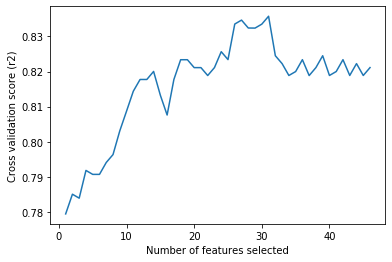

In [33]:
# Linear Regression Feature Reduction
cv = model_selection.KFold(shuffle=True, n_splits=10)
logreg = linear_model.LogisticRegressionCV(penalty='l1', solver='liblinear')

rfecv = feature_selection.RFECV(logreg, cv=cv)
rfecv.fit(X, y)
logreg_cols = rfecv.get_support()
X_logreg = X[X.columns[logreg_cols]]

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (r2)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [34]:
# Linear Regression with Reduced Features
X = pd.get_dummies(train_imputed[(train_imputed.Embarked.notnull())].drop(['PassengerId', 'Survived', 
                                                            'Name', 'Age', 'Ticket', 
                                                            'Cabin', 'ticket_letters', 
                                                            'Sex',  'embarked_num', 
                                                            'Pclass'], axis=1))
y = train_imputed[(train_imputed.Embarked.notnull())].Survived

logreg = linear_model.LogisticRegressionCV(penalty='l1', solver='liblinear')

cv = model_selection.StratifiedKFold(shuffle=True, n_splits=10)
print (model_selection.cross_val_score(logreg, X_logreg, y, cv=cv).mean(), '+/-', model_selection.cross_val_score(linreg, X_logreg, y, cv=cv).std())

0.8290730337078651 +/- 0.07126997311786568


In [35]:
# Ensemble of the three models
X = pd.get_dummies(train_imputed[(train_imputed.Embarked.notnull())].drop(['PassengerId', 'Survived', 
                                                            'Name', 'Age', 'Ticket', 
                                                            'Cabin', 'ticket_letters', 
                                                            'Sex',  'embarked_num', 
                                                            'Pclass'], axis=1))
pred_logreg = model_selection.cross_val_predict(logreg, X_logreg, y, method='predict_proba')[:,1]
prediction_logreg = model_selection.cross_val_predict(logreg, X_logreg, y)
X = train_imputed[(train_imputed.Embarked.notnull())].drop(['PassengerId', 'Survived', 
                                                            'Name', 'Age', 'Ticket', 
                                                            'Cabin', 'ticket_letters', 
                                                            'Sex',  'Embarked', 
                                                            'Pclass_cat'], axis=1)
pred_rf = model_selection.cross_val_predict(rf, X, y, method='predict_proba')[:,1]
prediction_rf = model_selection.cross_val_predict(rf, X, y)
pred_xgb = model_selection.cross_val_predict(xgb, X, y, method='predict_proba')[:,1]
prediction_xgb = model_selection.cross_val_predict(xgb, X, y)

overall_pred = (pred_logreg + pred_rf + pred_xgb)/3
overall_prediction = [1 if p>.5 else 0 for p in overall_pred]
print ('logreg', metrics.accuracy_score(y, prediction_logreg))
print ('rf', metrics.accuracy_score(y, prediction_rf))
print ('xgb', metrics.accuracy_score(y, prediction_xgb))
print ('overall', metrics.accuracy_score(y, overall_prediction))
y_pred = [1 if p>.5 else 0 for p in overall_pred]

logreg 0.8278965129358831
rf 0.8447694038245219
xgb 0.8166479190101237
overall 0.8335208098987626


In [37]:
# classification report
print (metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       549
           1       0.81      0.74      0.77       340

    accuracy                           0.83       889
   macro avg       0.83      0.81      0.82       889
weighted avg       0.83      0.83      0.83       889



In [38]:
# confusion matrix
actual_vs_cross_val_pred = pd.DataFrame([y_pred, list(y.values)]).transpose()
actual_vs_cross_val_pred.columns = ['cross_val_pred', 'actual']
pd.crosstab(actual_vs_cross_val_pred.cross_val_pred, actual_vs_cross_val_pred.actual)

actual,0,1
cross_val_pred,,
0,491,90
1,58,250


AUC: 0.8789296046287367


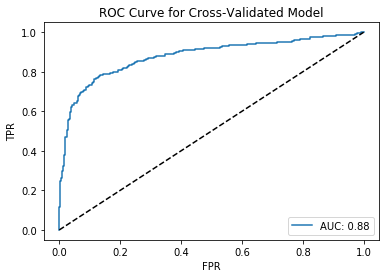

In [39]:
# ROC Curve to understand how it does at different thresholds
y_score = overall_pred
fpr, tpr, thresholds = metrics.roc_curve(y, y_score)
print ('AUC:', metrics.auc(fpr, tpr))

plt.plot(fpr, tpr, label='AUC: {:.2}'.format(metrics.auc(fpr, tpr)))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for Cross-Validated Model')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc='lower right')

In [40]:
# Application on Test Set, for Kaggle
logreg.fit(X_logreg, y)
xgb.fit(X, y)
rf.fit(X, y)

X_test_a = pd.get_dummies(test_imputed.drop(['PassengerId', 'Name', 'Age', 'Ticket', 
                                                            'Cabin', 'ticket_letters', 
                                                            'Sex',  'embarked_num', 
                                                            'Pclass'], axis=1))
X_logreg_test = X_test_a[X_test_a.columns[logreg_cols]]

X_test = test_imputed.drop(['PassengerId', 'Name', 'Age', 'Ticket', 
                                                            'Cabin', 'ticket_letters', 
                                                            'Sex',  'Embarked', 
                                                            'Pclass_cat'], axis=1)
y_prob_log = logreg.predict_proba(X_logreg_test)[:,1]
y_prob_xgb = xgb.predict_proba(X_test)[:,1]
y_prob_rf = rf.predict_proba(X_test)[:,1]
y_prob_avg = (y_prob_log + y_prob_xgb + y_prob_rf)/3
y_pred = [1 if p>.5 else 0 for p in y_prob_avg]

In [41]:
sample = pd.read_csv('data/gendermodel.csv', index_col='PassengerId')

In [42]:
sample.Survived = y_pred

In [43]:
sample.to_csv('test_predictions.csv')